# Dataproject

In this data project, we will explore the development of wages for women and men from 2009 to 2021 in Denmark. Wages are an important indicator of economic well-being, and examining the trends in wages for different demographic groups can provide insight into issues of income inequality and gender disparities in the labor market. Using data from Statistics Denmark we will look at the pay gab between women and men. 

Imports and set magics:

In [167]:
%pip install pandas-datareader
%pip install matplotlib-venn

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from scipy.stats.mstats import gmean
from IPython.display import display

import pandas_datareader 
import pydst 

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# User written modules
import dataproject


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [168]:
# Loading the data from Statistikbanken
filename1 = 'Kvinder.xlsx'
pd.read_excel(filename1).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Kvinder,Bopælskommune,Hele landet,32609,33771,34253,35041,35514,36034,36718,37216,38071,38871,39715,40818,41606
3,NaN,NaN,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,41327,42359,43664,44490
4,NaN,NaN,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,45812,46888,48234,49120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,29960,30686,31040,31893,31999,32589,33118,33487,34326,34966,35777,36532,37484
95,NaN,NaN,Læsø,29091,30080,30385,31322,32187,32224,33005,32870,33858,34039,34571,36025,35832
96,NaN,NaN,Mariagerfjord,30277,31534,31575,32277,32585,33063,33591,33885,34493,35293,36080,36948,37784
97,NaN,NaN,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,34106,35095,36178,36767


In [169]:
# We are dropping rows
women = pd.read_excel(filename1, skiprows=2)

# We drop the first three columns
del women['Unnamed: 0'], women['Unnamed: 1']

# We rename the variable 'Unnamed: 2' 
women.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'women{i}' 
women.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = women.City.str.contains('NaN')
I |= women.City.str.contains('Hele landet')
women.loc[I, :]
women = women.loc[I == False]

# We reset the index 
women.reset_index(inplace = True, drop = True) # Drop old index too
women.iloc[0:99,:]

# We convert the index from wide to long
women_long = pd.melt(women, id_vars=['City'], var_name='year', value_name='women')
women_long['year'] = women_long['year'].str.extract('(\d+)', expand=False).astype(int)
women_long.head(99)


,City,year,women
0,København,2009,34298
1,Frederiksberg,2009,37771
2,Dragør,2009,38251
3,Tårnby,2009,33325
4,Albertslund,2009,32507
...,...,...,...
94,Morsø,2009,29683
95,Rebild,2009,31467
96,Thisted,2009,29694
97,Vesthimmerlands,2009,29597


In [170]:
# Loading the Data from Statistikbanken
filename2 = 'Mænd.xlsx'
pd.read_excel(filename2).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Mænd,Bopælskommune,Hele landet,38433,39754,40524,41294,41673,42050,42622,43071,43923,44693,45591,46487,47629
3,NaN,NaN,København,38693,40075,40993,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
4,NaN,NaN,Frederiksberg,44442,46528,47042,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,34772,35808,35946,36695,36742,37387,38241,38685,39388,40117,40963,41653,42733
95,NaN,NaN,Læsø,34139,38258,37985,40077,41007,39969,39101,38300,37824,41182,39280,40123,39011
96,NaN,NaN,Mariagerfjord,34915,36409,36466,37455,37714,38153,38684,39018,39904,40589,41311,41842,42924
97,NaN,NaN,Morsø,32918,34059,33753,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037


In [171]:
# Now we are dropping rows
men = pd.read_excel(filename2, skiprows=2)

# Now we drop the first three columns
del men['Unnamed: 0'], men['Unnamed: 1']

# Now we rename the variable 'Unnamed: 2' 
men.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'men{i}' 
men.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = men.City.str.contains('NaN')
I |= men.City.str.contains('Hele landet')
men.loc[I, :]
men = men.loc[I == False]

# We reset the index 
men.reset_index(inplace = True, drop = True) # Drop old index too
men.iloc[0:99,:]

# We convert the index from wide to long
men_long = pd.melt(men, id_vars=['City'], var_name='year', value_name='men')
men_long['year'] = men_long['year'].str.extract('(\d+)', expand=False).astype(int)
men_long.head(99)



,City,year,men
0,København,2009,38693
1,Frederiksberg,2009,44442
2,Dragør,2009,48092
3,Tårnby,2009,38744
4,Albertslund,2009,37040
...,...,...,...
94,Morsø,2009,32918
95,Rebild,2009,36614
96,Thisted,2009,33257
97,Vesthimmerlands,2009,33276


## Plotting the data

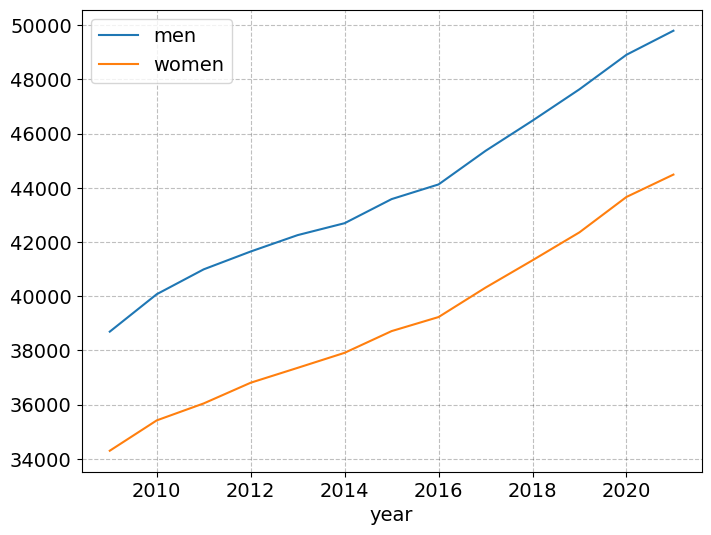

In [172]:
# Data with women
women_long_2 = women_long.reset_index()
women_long_2.loc[women_long_2.City == 'København', :]
women_copenhagen = women_long_2.loc[women_long_2['City'] == 'København', :]

# Data with men
men_long_2 = men_long.reset_index()
men_long_2.loc[men_long_2.City == 'København', :]
men_copenhagen = men_long_2.loc[men_long_2['City'] == 'København', :]

# Plotting
ax = men_copenhagen.plot(x='year', y='men', label = 'men')
women_copenhagen.plot(x='year', y='women', ax=ax)
ax.figure.set_size_inches(8, 6) 


The plot shows the difference in pay between men and women in Copenhagen from 2009 to 2021. The x-axis represents the years, while the y-axis represents the wage amount. In 2009, the average yearly wage for men was 38693 DKK, while for women it was 34298 DKK. Over the years, both groups experienced an increase in wages. However, there is a noticeable gender wage gap, with men consistently earning more than women in each year.

The difference in wages between men and women remains relatively consistent over time. For example, in 2010, men earned an average yearly wage of 40075 DKK, compared to women who earned 35418 DKK. In 2021, the gender wage gap was still present, with men earning an average of 49800 DKK, while women earned an average of 44490 Danish kroner.

It is worth noting that the wage gap between men and women in Copenhagen is consistent with the gender wage gap in Denmark as a whole. According to Statistics Denmark, in 2020, women earned approximately 12.2% less than men, with an average hourly wage of 141,50 DKK, compared to men's average hourly wage of 161,09 DKK.

In conclusion, the plot reveals that the gender wage gap in Copenhagen persists over the period of 2009-2021. Both men and women experienced an increase in wages, but the difference in pay between the genders remained relatively stable over time. Men consistently earned more than women in each year. This wage gap in Copenhagen is in line with the gender wage gap in Denmark as a whole. It suggests that despite efforts to reduce the wage gap, there is still work to be done to achieve gender pay equity.

In [173]:
def plot_func(df, City):
    # Function that operates on data set
    I = df['City'] == City
    ax = df.loc[I,:].plot(x='year', y='women', style='-o', color='tab:orange', legend=False)
    # Set figure size
    ax.figure.set_size_inches(8, 6) 

# Create the interactive widget
interactive_plot = widgets.interactive(plot_func, 
    df = widgets.fixed(women_long_2),
    City = widgets.Dropdown(description='City', 
                                    options=women_long_2.City.unique(), 
                                    value='København')
)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='City', options=('København', 'Frederiksberg', 'Dragør', 'Tårnby', …

In [174]:
def plot_func(df, City):
    # Function that operates on data set
    I = df['City'] == City
    ax = df.loc[I,:].plot(x='year', y='men', style='-o', color='tab:blue', legend=False)
    # Set figure size
    ax.figure.set_size_inches(8, 6) 

# Create the interactive widget
interactive_plot = widgets.interactive(plot_func, 
    df = widgets.fixed(men_long_2),
    City = widgets.Dropdown(description='City', 
                                    options=men_long_2.City.unique(), 
                                    value='København')
)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='City', options=('København', 'Frederiksberg', 'Dragør', 'Tårnby', …

# Merge data sets

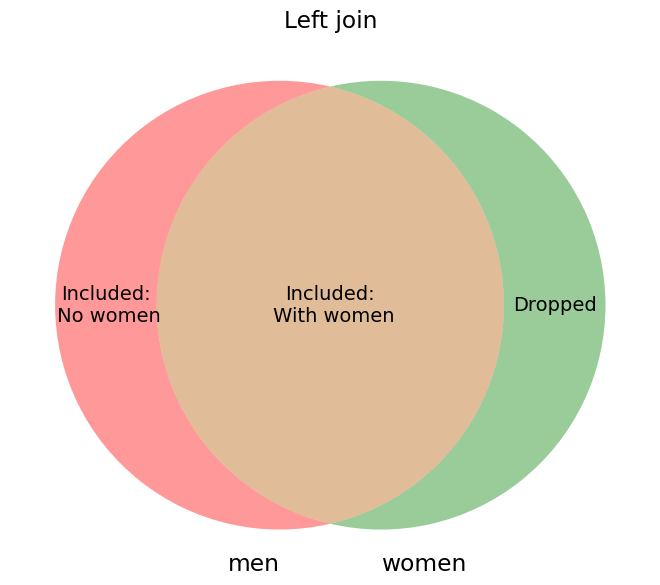

In [175]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('men', 'women'))
v.get_label_by_id('100').set_text('Included:\n No women')
v.get_label_by_id('010').set_text('Dropped' )
v.get_label_by_id('110').set_text('Included:\n With women')
plt.title('Left join')
plt.show()

In [176]:
# We make a left join merge 
join = pd.merge(women, men, on='City', how='left')
join.head(99)

,City,women2009,women2010,women2011,women2012,women2013,women2014,women2015,women2016,women2017,...,men2012,men2013,men2014,men2015,men2016,men2017,men2018,men2019,men2020,men2021
0,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,...,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
1,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,...,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
2,Dragør,38251,39025,40591,41402,41644,42429,43785,44102,45306,...,53073,53531,53992,55234,57078,57765,59394,60548,61217,62891
3,Tårnby,33325,34113,35078,35412,35897,36468,37223,37724,38562,...,41151,41752,42069,42543,43254,44417,45676,46628,47539,48878
4,Albertslund,32507,33764,34219,35147,35287,35864,36241,36676,37261,...,39079,39764,39923,40460,40563,41284,41738,42798,43484,44636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,...,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037
95,Rebild,31467,32216,32716,33501,33827,34583,35049,35606,36710,...,39604,39651,40543,41182,41825,42631,43533,44538,45249,46381
96,Thisted,29694,30589,30839,31627,31852,32233,32560,33110,34051,...,35383,35900,36113,36352,36766,37379,38059,38514,39292,40469
97,Vesthimmerlands,29597,30558,30851,31118,31438,32261,32558,33107,33629,...,34263,34489,35222,35989,37012,37306,38258,38653,39768,40550


In [177]:
join_long = join.melt(id_vars=['City'], var_name = 'Year', value_name='Salary')
join_long['Gender'] = join_long['Year'].str[:-4]
join_long['Year'] = join_long['Year'].str[-4:]
join_long['City'] = join_long['City'].str.slice(start=9)
join_long.sort_values(['Year', 'City'], ignore_index=True)

,City,Year,Salary,Gender
0,,2009,34298,women
1,,2009,38251,women
2,,2009,33325,women
3,,2009,34963,women
4,,2009,32442,women
...,...,...,...,...
2673,NaN,2021,NaN,women
2674,NaN,2021,NaN,men
2675,NaN,2021,NaN,men
2676,NaN,2021,NaN,men


# Analysis

In [178]:
# We calculate the growthrate and the geometric mean for women
women_copenhagen['Growth_Rate'] = (women_copenhagen['women'].pct_change(periods=1) * 100)

# We drop the NaN value from the dataset 
women_copenhagen2 = women_copenhagen.tail(-1)

gm1 = (gmean(women_copenhagen2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
women_copenhagen2['Gmean'] = gm1
women_copenhagen2['Difference'] = women_copenhagen2.Growth_Rate - women_copenhagen2.Gmean
women_copenhagen2.head(10)

2.19


/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/581670259.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/581670259.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/581670259.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,index,City,year,women,Growth_Rate,Gmean,Difference
101,101,København,2010,35418,3.265497,2.19182,1.073676
202,202,København,2011,36044,1.767463,2.19182,-0.424357
303,303,København,2012,36808,2.119632,2.19182,-0.072189
404,404,København,2013,37357,1.491524,2.19182,-0.700296
505,505,København,2014,37912,1.485665,2.19182,-0.706155
606,606,København,2015,38713,2.112788,2.19182,-0.079033
707,707,København,2016,39232,1.340635,2.19182,-0.851185
808,808,København,2017,40318,2.768148,2.19182,0.576328
909,909,København,2018,41327,2.502604,2.19182,0.310784
1010,1010,København,2019,42359,2.497157,2.19182,0.305337


In [179]:
# We calculate the growthrate and the geometric mean for men
men_copenhagen['Growth_Rate'] = (men_copenhagen['men'].pct_change(periods=1) * 100)

# We drop the NaN value from the dataset 
men_copenhagen2 = men_copenhagen.tail(-1)

gm1 = (gmean(men_copenhagen2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
men_copenhagen2['Gmean'] = gm1
men_copenhagen2['Difference'] = men_copenhagen2.Growth_Rate - men_copenhagen2.Gmean
men_copenhagen2.head(10)

2.13


/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/1315414629.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/1315414629.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jf/wvx5z8gs0pb_16dvq2x7qv280000gn/T/ipykernel_18799/1315414629.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,index,City,year,men,Growth_Rate,Gmean,Difference
101,101,København,2010,40075,3.571705,2.125237,1.446468
202,202,København,2011,40993,2.290705,2.125237,0.165468
303,303,København,2012,41651,1.605152,2.125237,-0.520085
404,404,København,2013,42256,1.452546,2.125237,-0.672691
505,505,København,2014,42696,1.041272,2.125237,-1.083965
606,606,København,2015,43585,2.082162,2.125237,-0.043075
707,707,København,2016,44127,1.243547,2.125237,-0.881690
808,808,København,2017,45366,2.807805,2.125237,0.682568
909,909,København,2018,46481,2.457788,2.125237,0.332551
1010,1010,København,2019,47639,2.491341,2.125237,0.366103


/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fd0ace35790> has a label of '_nolegend_' which cannot be automatically added to the legend.

/Users/bruger/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fd0ace2d610> has a label of '_nolegend_' which cannot be automatically added to the legend.



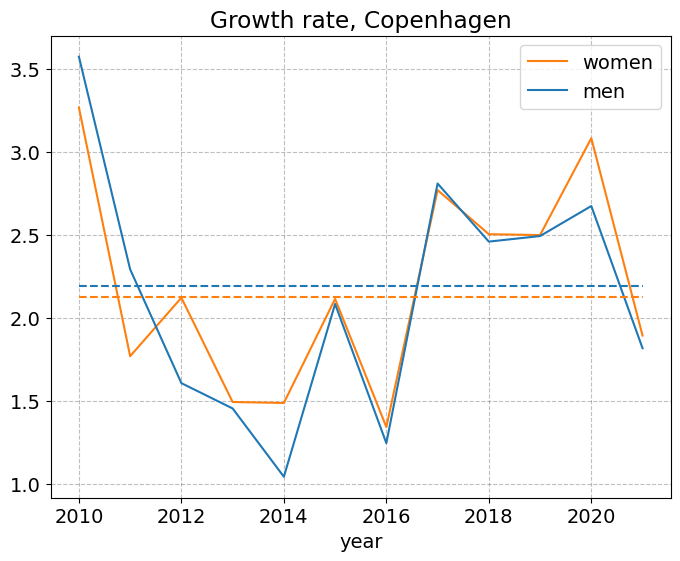

In [180]:
# Plotting growth rate and the geometric mean
ax = women_copenhagen2.plot(x='year', y='Growth_Rate', label = 'women', color='tab:orange')
ax = men_copenhagen2.plot(x='year', y='Growth_Rate', label = 'men', color='tab:blue', ax=ax)
ax = women_copenhagen2.plot(x='year', y='Gmean', color='tab:blue', linestyle='--', label='_nolegend_', ax=ax)
men_copenhagen2.plot(x='year', y='Gmean', color='tab:orange', linestyle='--', label='_nolegend_', title='Growth rate, Copenhagen', ax=ax)
ax.figure.set_size_inches(8, 6) 

In this plot, we aim to analyze and compare the growth rate of wages between men and women in Copenhagen from 2009 to 2021. We have obtained the wages data for men and women separately and have plotted them to visually represent their growth rate over the years.

The growth rate for the wages of men shows a steady decrease from 2009 to 2016, with some fluctuations in between. The growth rate for men then increases in the year 2016, whereafter it decreases with some fluctuations towards the year 2021. On the other hand, the growth rate for women's wages shows a similar trend but with a bit more fluctuations, resulting in a noticeable gap between the growth rates of men's and women's wages. Women's wages tend to increase more in the years from 2012 to 2015 and again in the year of 2020 in Copenhagen, which contributes to the difference in growth rates.

The growth rate of men's wages ranges from approximately around 1.1% to 3.5%, with an average of around approximately 2.2%. In contrast, the growth rate for women's wages ranges from approximately 1.5% to 3.3%, with an average of around 2.1%. This suggests that while both men and women experienced overall growth in wages, men's wages grew at a slightly faster rate in the period between 2009 to 2021.

It is evident that the differential between the wages of men and women has displayed a variable pattern across the years, with women exhibiting a higher growth rate than men in some years. However, the growth rates of wages for both genders have generally followed a similar treend over the  period of 2009-2021.

n conclusion, our analysis of the growth rate of wages for men and women in Copenhagen from 2009 to 2021 reveals some interesting patterns. The growth rate for men's wages shows a steady decrease, with fluctuations in between, whereas the growth rate for women's wages exhibits a similar trend but with more fluctuations resulting in a noticeable gap between the growth rates of the two genders. On average, men's wages grew at a slightly faster rate than women's wages, although women's wages had higher growth rates in some years.

Our findings suggest that the gender pay gap in Copenhagen is not a fixed phenomenon and has shown some variability over the years. While both men and women experienced wage growth, the differential in growth rates indicates that gender inequality in wages persists.

# Conclusion

Our analysis of the wage data for men and women in Copenhagen from 2009 to 2021 highlights the existence of a persistent gender wage gap. The analysis of the wage data from Copenhagen between 2009 and 2021 reveals that the gender pay gap remains a persistent issue in the city. Despite both men and women experiencing an increase in wages over the period, men consistently earned more than women in each year. The difference in wages between the genders remained relatively stable over time, with the wage gap in Copenhagen consistent with the gender wage gap in Denmark as a whole.

The growth rate of wages for men and women shows that both genders experienced a positive trend in the period. Men's wages showed a steady decrease with some fluctuations from 2009 to 2016, followed by an increase in 2016, and then a slight decrease with fluctuations until 2021. Women's wages showed a similar trend, but with more fluctuations, resulting in a noticeable gap between the growth rates of men and women's wages. The growth rate of men's wages ranged from approximately 1.1% to 3.5%, with an average of around 2.2%, while women's wages ranged from approximately 1.5% to 3.3%, with an average of around 2.1%.

The findings suggest that gender inequality in wages is a persistent issue in Copenhagen. While both genders experienced an increase in wages, men's wages grew at a slightly faster rate, resulting in a widening gap between the wages of men and women.

It is essential to understand that the gender pay gap is a complex issue that is influenced by various factors, such as occupational segregation, discrimination, and the lack of work-life balance. Addressing the gender pay gap will require comprehensive policies that address these factors and promote gender equality in the workplace. It is crucial to recognize that closing the gender pay gap is not just a matter of fairness but also contributes to economic growth by utilizing the talents of the entire workforce, irrespective of gender.

In conclusion, the analysis of the wage data from Copenhagen between 2009 and 2021 reveals that gender inequality in wages persists in the city. The wage gap between men and women remained relatively stable over time, with men consistently earning more than women in each year. While both genders experienced an increase in wages, men's wages grew at a slightly faster rate, indicating that more work needs to be done to close the gender wage gap. Addressing the gender pay gap will require comprehensive policies that address the factors contributing to gender inequality in the workplace.